In [22]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.


from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [23]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [24]:
data.shape  

(14640, 15)

In [25]:
data.head()   

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### 2. Understanding of data-columns: (5 Marks)

a. Drop all other columns except “text” and “airline_sentiment”.

b. Check the shape of data.

c. Print first 5 rows of data.


In [26]:
data = data.loc[:, ['text','airline_sentiment']]

In [27]:
data.shape

(14640, 2)

In [28]:
pd.set_option('display.max_colwidth', None) 
data.head(5)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [29]:
df = data.groupby('airline_sentiment').count()
print(df)

                   text
airline_sentiment      
negative           9178
neutral            3099
positive           2363


### 3. Text pre-processing: Data preparation. (20 Marks)

a. Html tag removal.

b. Tokenization.

c. Remove the numbers.

d. Removal of Special Characters and Punctuations.

e. Conversion to lowercase.

f. Lemmatize or stemming.

g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)

h. Print first 5 rows of data after pre-processing.


In [30]:
#remove html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [31]:
#remove contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text) 

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [32]:
#remove numbers

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [33]:
#Tokenization


data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()  

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [34]:
#remove special characters and punctuations

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

data['text'] = data['text'].apply(lambda x: remove_punctuation(x))
data.head()

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [35]:
#Conversion to lowercase.

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


data['text'] = data['text'].apply(lambda x: to_lowercase(x))
data.head()

,text,airline_sentiment
0,"[virginamerica, what, dhepburn, said]",neutral
1,"[virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]",neutral
3,"[virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[virginamerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [36]:
# save the stopwords in a list named stopwords.
stopwords = stopwords.words('english')
#removal of stopwords
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
data.head()

,text,airline_sentiment
0,"[virginamerica, dhepburn, said]",neutral
1,"[virginamerica, plus, added, commercials, experience, tacky]",positive
2,"[virginamerica, today, must, mean, need, take, another, trip]",neutral
3,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]",negative
4,"[virginamerica, really, big, bad, thing]",negative


In [37]:
#Lemmatize 
lemmatizer = WordNetLemmatizer()


def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

#not used in this example
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems


data['text'] = data['text'].apply(lambda x: lemmatize_list(x))
data.head()

,text,airline_sentiment
0,"[virginamerica, dhepburn, say]",neutral
1,"[virginamerica, plus, add, commercials, experience, tacky]",positive
2,"[virginamerica, today, must, mean, need, take, another, trip]",neutral
3,"[virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]",negative
4,"[virginamerica, really, big, bad, thing]",negative


In [38]:
#Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)

def join_words(words):
    return ' '.join(words)

data['text'] = data['text'].apply(lambda x: join_words(x))
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


### 4.  Vectorization: (10 Marks)
        a. Use CountVectorizer.
        b. Use TfidfVectorizer.

In [39]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(data['text'])
# summarize
print(vectorizer.vocabulary_)
# encode document
count_vector = vectorizer.transform(data['text'])
# summarize encoded vector
print(count_vector.shape)
count_vector_array = count_vector.toarray()



{'virginamerica': 11476, 'dhepburn': 2576, 'say': 8335, 'plus': 7341, 'add': 134, 'commercials': 1885, 'experience': 3292, 'tacky': 9309, 'today': 10831, 'must': 6311, 'mean': 5927, 'need': 6402, 'take': 9321, 'another': 474, 'trip': 10980, 'really': 7786, 'aggressive': 208, 'blast': 1066, 'obnoxious': 6728, 'entertainment': 3096, 'guests': 4187, 'face': 3337, 'little': 5564, 'recourse': 7832, 'big': 1017, 'bad': 797, 'thing': 10694, 'seriously': 8484, 'would': 11883, 'pay': 7104, 'flight': 3563, 'seat': 8412, 'play': 7305, 'fly': 3638, 'va': 11374, 'yes': 11977, 'nearly': 6398, 'every': 3202, 'time': 10778, 'vx': 11526, 'ear': 2910, 'worm': 11858, 'go': 4032, 'away': 754, 'miss': 6130, 'prime': 7527, 'opportunity': 6855, 'men': 5988, 'without': 11800, 'hat': 4281, 'parody': 7043, 'https': 4562, 'tcomwpggrezp': 9953, 'well': 11653, 'notbut': 6635, 'amaze': 367, 'arrive': 596, 'hour': 4529, 'early': 2913, 'good': 4058, 'know': 5292, 'suicide': 9155, 'second': 8423, 'lead': 5430, 'death'

In [40]:
#Tf-Idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(data['text'])
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform(data['text'])
# summarize encoded vector
print(vector.shape)
tfidf_vector_array = vector.toarray()


{'virginamerica': 11476, 'dhepburn': 2576, 'say': 8335, 'plus': 7341, 'add': 134, 'commercials': 1885, 'experience': 3292, 'tacky': 9309, 'today': 10831, 'must': 6311, 'mean': 5927, 'need': 6402, 'take': 9321, 'another': 474, 'trip': 10980, 'really': 7786, 'aggressive': 208, 'blast': 1066, 'obnoxious': 6728, 'entertainment': 3096, 'guests': 4187, 'face': 3337, 'little': 5564, 'recourse': 7832, 'big': 1017, 'bad': 797, 'thing': 10694, 'seriously': 8484, 'would': 11883, 'pay': 7104, 'flight': 3563, 'seat': 8412, 'play': 7305, 'fly': 3638, 'va': 11374, 'yes': 11977, 'nearly': 6398, 'every': 3202, 'time': 10778, 'vx': 11526, 'ear': 2910, 'worm': 11858, 'go': 4032, 'away': 754, 'miss': 6130, 'prime': 7527, 'opportunity': 6855, 'men': 5988, 'without': 11800, 'hat': 4281, 'parody': 7043, 'https': 4562, 'tcomwpggrezp': 9953, 'well': 11653, 'notbut': 6635, 'amaze': 367, 'arrive': 596, 'hour': 4529, 'early': 2913, 'good': 4058, 'know': 5292, 'suicide': 9155, 'second': 8423, 'lead': 5430, 'death'

### Fit and evaluate model using both type of vectorization. (6+6 Marks)

#### Using CountVectorizer

In [41]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(count_vector_array,data.airline_sentiment, test_size=0.3, random_state=42)

In [42]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, count_vector_array, data.airline_sentiment, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7151639344262295


In [43]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test)

[[2509  223   82]
 [ 430  385   69]
 [ 199  106  389]]


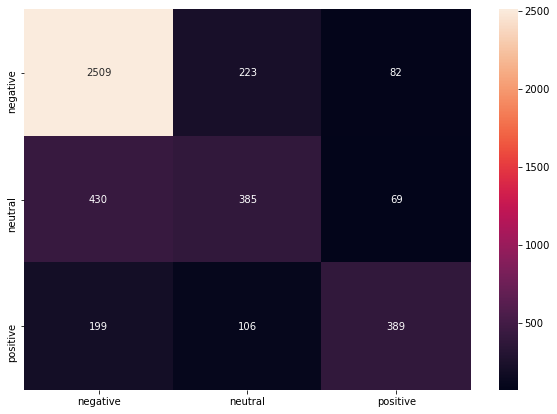

In [44]:

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative','neutral', 'positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [45]:
cls = [
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=10)
       ]

cls_name = []

i = 0
accuracy = []
for cl in cls:
    model = cl.fit(X_train,y_train)
    lbl_pred = model.predict(X_test)
    a = (100*accuracy_score(lbl_pred, y_test))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, y_test))
    i +=1

DecisionTreeClassifier  Accuracy Score : 70.72%
              precision    recall  f1-score   support

    negative       0.81      0.81      0.81      2808
     neutral       0.47      0.45      0.46       919
    positive       0.58      0.61      0.60       665

    accuracy                           0.71      4392
   macro avg       0.62      0.63      0.62      4392
weighted avg       0.71      0.71      0.71      4392

RandomForestClassifier  Accuracy Score : 75.16%
              precision    recall  f1-score   support

    negative       0.90      0.80      0.85      3194
     neutral       0.45      0.57      0.50       693
    positive       0.52      0.71      0.60       505

    accuracy                           0.75      4392
   macro avg       0.62      0.69      0.65      4392
weighted avg       0.79      0.75      0.76      4392



#### Using TfIdfVectorizer

In [46]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector_array,data.airline_sentiment, test_size=0.3, random_state=42)

In [47]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, tfidf_vector_array, data.airline_sentiment, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7077868852459017


In [48]:
# Predict the result for test data using the model built above.
result = forest.predict(X_test)

[[2626  141   47]
 [ 476  360   48]
 [ 262   97  335]]


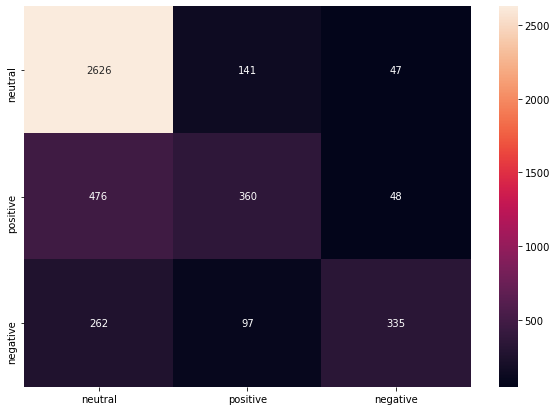

In [49]:
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative','neutral', 'positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [50]:
cls = [
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=10)
       ]

cls_name = []

i = 0
accuracy = []
for cl in cls:
    model = cl.fit(X_train,y_train)
    lbl_pred = model.predict(X_test)
    a = (100*accuracy_score(lbl_pred, y_test))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, y_test))
    i +=1

DecisionTreeClassifier  Accuracy Score : 68.49%
              precision    recall  f1-score   support

    negative       0.81      0.78      0.80      2928
     neutral       0.41      0.43      0.42       852
    positive       0.52      0.59      0.55       612

    accuracy                           0.68      4392
   macro avg       0.58      0.60      0.59      4392
weighted avg       0.69      0.68      0.69      4392

RandomForestClassifier  Accuracy Score : 75.36%
              precision    recall  f1-score   support

    negative       0.93      0.78      0.85      3367
     neutral       0.39      0.60      0.48       581
    positive       0.49      0.77      0.60       444

    accuracy                           0.75      4392
   macro avg       0.61      0.72      0.64      4392
weighted avg       0.82      0.75      0.77      4392



### Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

In [51]:
Here the attributes we are taking for processing is airline_sentiment and the text column which is nothing but the tweets. 
As per the tweets the sentiments are classified into three categories namely, negative, nuetral and positive. We use html tag removal first
followed by removal of contractions, removal of numbers, tokenization, removal of punctations ans special characters, converting the text to lowercase, 
removal of stopwords. After all these we do Lemmatization using the WordnetLemmatizer. Then we join the words again from the
tokenized array and we do both CounterVectorization and TF-IDF vectorization.

The data is split into training and test and then RandomForestClassifier model is built with 10 estimators. This we do for 
both the term matrix developed usind tf-idf and countvectorizer. An effort to compare models between RandomForest and DecisionTree 
is also done. In all cases we get a accuracy between 70-80% in predicting the sentiment of a tweet.The corresponding heatmaps are
also generated. Predominantly the most data is with "negative" rating. 

SyntaxError: invalid syntax (<ipython-input-51-7b907ad8eb0b>, line 1)